## Exercise 4:  Generate a Random Network Topology with NetworkX

### 1. Generate random network topology

Edge A-B with weight 3
Edge A-I with weight 2
Edge B-I with weight 1
Edge B-F with weight 1
Edge B-G with weight 3
Edge B-D with weight 1
Edge C-G with weight 3
Edge C-E with weight 2
Edge D-J with weight 2
Edge D-I with weight 5
Edge D-E with weight 1
Edge E-H with weight 1
Edge E-F with weight 1
Edge G-J with weight 1
Edge G-I with weight 2
Edge H-I with weight 1


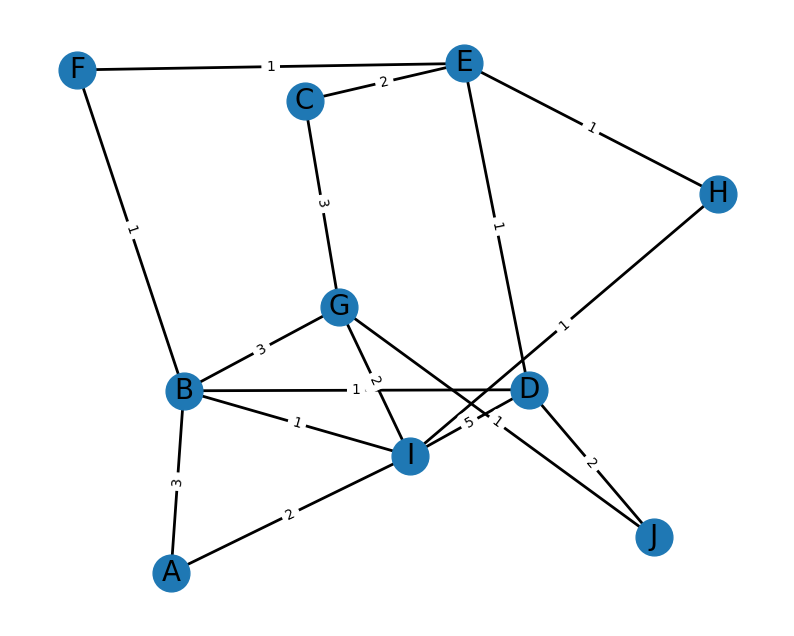

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
random.seed(42)

# Create a new graph
G_random = nx.Graph()

# Add nodes
nodes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
G_random.add_nodes_from(nodes)

# Randomly add edges with weights
num_connections = 15
while G_random.number_of_edges() <= num_connections:
    # Randomly select two different nodes
    u, v = random.sample(nodes, 2)
    # Assign a random weight between 1 and 5
    weight = random.randint(1, 5)
    # Add an edge with the random weight if it doesn't already exist
    if not G_random.has_edge(u, v):
        G_random.add_edge(u, v, weight=weight)

# Print each edge with its corresponding weight.
for (u, v, w) in G_random.edges(data=True):
    print(f"Edge {u}-{v} with weight {w['weight']}")

# Draw the network with random edges
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_random)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_random, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_random, pos, width=2)

# labels
nx.draw_networkx_labels(G_random, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(G_random, "weight")
nx.draw_networkx_edge_labels(G_random, pos, edge_labels=edge_labels)

plt.axis("off")
plt.show()


#### 2. Find the shortest paths using **dijkstra_path**

In [2]:
# Let's find the shortest paths using Dijkstra's algorithm for the randomly generated graph G_random
shortest_paths = {}

# Calculate shortest path for each node pair
for source in G_random.nodes():
    for target in G_random.nodes():
        if source != target:
            try:
                # Calculate the shortest path
                path = nx.dijkstra_path(G_random, source, target)
                # Store the path length and path for each node pair
                shortest_paths[(source, target)] = {
                    "path": path,
                    "length": nx.dijkstra_path_length(G_random, source, target)
                }
            except nx.NetworkXNoPath:
                # In case there is no path between the node pair
                shortest_paths[(source, target)] = "No path found"

# To keep the output manageable, let's just print the shortest paths and lengths for node 'A' to other nodes
for key, value in shortest_paths.items():
    if key[0] == 'A':  # Change 'A' to other nodes if you want to check their paths
        print(f"Shortest path from {key[0]} to {key[1]}: {value}")

Shortest path from A to B: {'path': ['A', 'B'], 'length': 3}
Shortest path from A to C: {'path': ['A', 'I', 'H', 'E', 'C'], 'length': 6}
Shortest path from A to D: {'path': ['A', 'B', 'D'], 'length': 4}
Shortest path from A to E: {'path': ['A', 'I', 'H', 'E'], 'length': 4}
Shortest path from A to F: {'path': ['A', 'B', 'F'], 'length': 4}
Shortest path from A to G: {'path': ['A', 'I', 'G'], 'length': 4}
Shortest path from A to H: {'path': ['A', 'I', 'H'], 'length': 3}
Shortest path from A to I: {'path': ['A', 'I'], 'length': 2}
Shortest path from A to J: {'path': ['A', 'I', 'G', 'J'], 'length': 5}
